<h1 style="text-align: center; color: purple;" markdown="1">Assignment 2: Working with Data for the Final Project </h1>

<h2 style="text-align: center; color: #012169" markdown="1"> ECON220 Python Lab</h2>

<h3 style="text-align: center; color: #012169" markdown="1"> Author: Gavin Mason </h3>

### Table of Contents 
* [Loading Data into Python](#anchor1) 
* [Descriptive Statsistics of the Data](#anchor2) 
* [Modify Your Dataset](#anchor3) 
* [Stats by Group](#anchor4)
* [Graphs using Seaborn](#anchor5)

In [370]:
#Import packages here
import pandas as pd
import numpy as np
import os 
path = os.getcwd()
print(path)


#this allows you to remove some warnings about the manipulations that you do with Pandas
pd.options.mode.chained_assignment = None  # default='warn'



/Users/gavinmason


# Loading Data into Python <a class = anchor id = anchor1></a>

For this assignment you are going to start working with the data for your final project. First load the data into Python as shown in the video.  

Here is the code to load the data that is already an CSV object. **You need to change the path for your own path.** 

In [371]:
path = 'https://www.alexandramanta.info/media/econ220_labs/'
Econ220DataF21 = pd.read_csv(path + 'Econ220DataF21.csv')

# Clean the Dataframe and Show Descriptive Statistics of the Data <a class = anchor id = anchor2></a>


FOR THIS ASSIGNMENT YOU ARE REQUIRED TO USE THE PACKAGE PANDAS!!

- Create a new object *data21* selecting the variables that you see below and make a summary of this data, make sure this object is a dataframe. Using the Pandas package make a selection of the variables: 

 * age
 * GPA
 * sex
 * Happiness =  q18
 * Sleep = q29
 * Savings =  q68 

- Check the info of the data selection to see the types of the variables
- Then clean the variables so they have the adequate type
- Finally use show the descriptive stats of the variables

In [372]:
data21 = Econ220DataF21[["age", "GPA", "sex", "q18","q29","q68"]]

data21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     100 non-null    object 
 1   GPA     100 non-null    object 
 2   sex     101 non-null    object 
 3   q18     100 non-null    float64
 4   q29     100 non-null    object 
 5   q68     100 non-null    object 
dtypes: float64(1), object(5)
memory usage: 4.9+ KB


### Data Cleaning in the next cell 

See in the code cell what variables you have to clean. 

In this cleaning process use `.value_counts()` to inspect your variables but comment the line after the inspection so not tables with the vales show in the output. 


In [373]:

# clean age (Use method chaining here to clean age in one line)
data21['age'] = data21["age"].replace("[^0-9]"," ",regex = True).astype(float)

# clean q29
data21.loc[39,"q29"]=8
data21["q29"] = data21["q29"].astype(float)  
data21["q29"].value_counts(dropna=False)

#clean q68 
data21.loc[2,"q68"]=5000
data21.loc[17,"q68"]=13000
data21.loc[26,"q68"]=37000
data21.loc[28,"q68"]=20000
data21.loc[61,"q68"]=3000
data21.loc[85,"q68"]=20000
data21.loc[39,"q68"]=float("NaN")


data21["q68"] = data21["q68"].astype(float)
data21['q68'].value_counts(dropna=False)


# Fix the GPA variable here as shown in the video and in class
data21.loc[5,"GPA"]=3.76
data21.loc[10,"GPA"]=3.1
data21.loc[48,"GPA"]=3.3
data21.loc[69,"GPA"]=3.85
data21.loc[74,"GPA"]=3.94
data21.loc[80,"GPA"]=float("Nan")

data21["GPA"] = data21["GPA"].astype(float)
data21['GPA'].value_counts(dropna=False)


# Turn sex into a categorical variable
data21['sex'] = pd.Categorical(data21["sex"])

# Modify Your Dataset<a class = anchor id = anchor3></a>

Using the Pandas package use the rename function ([click link here for more information](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)) to rename q18, q14, q58 the following way 

   * Happiness =  q18
   * Sleep = q29
   * Savings =  q68

- show that the names have change and the variables have athe correct type with info. 

Create a few new variables using the Pandas package and incorporate them into your dataframe. 

- Goodsleep variable, $Sleep > 6$ 
- Over20 variable , a variable that is TRUE if a person is older than 20 or 20
- show the average of both variables, check  how the function round works [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html) and use it to get the same numbers as the results key. 

In [374]:
#Change names here
data21 = data21.rename(columns={"q18": "Happiness", "q29":"Sleep","q68":"Savings"})
data21.head()

,age,GPA,sex,Happiness,Sleep,Savings
0,22.0,3.50,Male,5.0,7.0,10000.0
1,22.0,3.35,Male,3.0,6.0,20000.0
2,22.0,3.30,Male,3.0,6.0,5000.0
3,21.0,3.60,Female,1.0,6.0,2000.0
4,23.0,3.50,Male,5.0,7.0,20000.0


In [375]:
# Fill in the conditions for the new variables"
data21["Goodsleep"] = data21["Sleep"]>6
data21["Over20"] = data21["age"]>=20

#Two ways of doing the same thing

#Find the average of the variables multiply it by 100 
print("The proportion of people with good sleep and over 21 is:\n", data21.agg({"Goodsleep" : ["mean"],"Over20" : ["mean"]}).round(2)*100)
# Remember the mean function ignores NA values when performing calculcations

#The proportion of people with good sleep and the proportion of people over 20 
#.value_counts(normalize = True) allows you to get the proportions in a boolean variable.  
print("The proportion of people with good sleep is:\n", data21["Goodsleep"].value_counts(normalize = True).round(2)*100) 
print("The proportion of people over 21 is:\n", data21["Over20"].value_counts(normalize = True).round(2)*100)


The proportion of people with good sleep and over 21 is:
       Goodsleep  Over20
mean       69.0    68.0
The proportion of people with good sleep is:
 True     69.0
False    31.0
Name: Goodsleep, dtype: float64
The proportion of people over 21 is:
 True     68.0
False    32.0
Name: Over20, dtype: float64


# Stats by Group <a class = anchor id = anchor4></a>

Now let's look at statistics by sex
- Use the `agg()` method to get the stats that appear in this table 

In [376]:
databygend = data21.groupby(["sex"])["Savings","GPA"].agg(["mean"])
databygend.round(2)

/var/folders/y_/d0wbwn_s1tlbh09zvpsn9bp40000gn/T/ipykernel_16101/3165990658.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  databygend = data21.groupby(["sex"])["Savings","GPA"].agg(["mean"])


,Savings,GPA
,mean,mean
sex,,
Female,13065.27,3.71
Male,12479.89,3.62


# Graphs using Seaborn <a class = anchor id = anchor5></a>

Let's try to do a graph with this data. 

**Seaborn** is a library for making statistical graphics in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

A scatter plot is a plot to display values for typically two variables for a set of data. 

In seaborn a scatter plot can be done using the follwoning syntax: 

`sns.scatterplot(x ='variable on x axis', 
                 y ='variable on x axis', 
                 hue ='variable to make a color differentiantion in your plot',
                 data = the data set taht contains your variables)`
                 
- Using the syntax above create a scatter plot of GPA and Sleep differentianting by sex. 
- try adding `.set(title='GPA vs Sleep by Sex')` to add a title to your graph
- there is a message that shows up above the graphs you can get rid of it by ading ; at the end of your line of code. 


This will wet your appetite for our next class on data visualization

[Text(0.5, 1.0, 'GPA vs Sleep by Sex')]

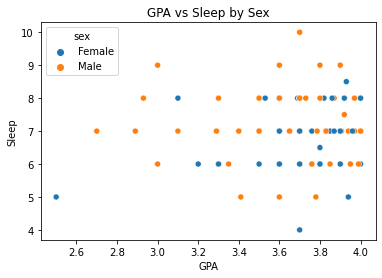

In [377]:
# Import seaborn package as sns
import seaborn as sns
# Graph here

sns.scatterplot(x="GPA", y="Sleep", hue="sex",data = data21).set(title="GPA vs Sleep by Sex")



&nbsp;
<hr />
<p style="font-family:palatino; text-align: center;font-size: 15px">ECON220 Python Programming Laboratory</a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px">Professor <em> Paloma Lopez de mesa Moyano</em></a></p>
<p style="font-family:palatino; text-align: center;font-size: 15px"><span style="color: #6666FF;"><em>paloma.moyano@emory.edu</em></span></p>

<p style="font-family:palatino; text-align: center;font-size: 15px">Department of Economics</a></p>
<p style="font-family:palatino; text-align: center; color: #012169;font-size: 15px">Emory University</a></p>

&nbsp;

In [337]:
# !jupyter nbconvert --to html nameoffile.ipynb